In [5]:
### Making the dataset long format for analysis

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data_onetask.csv")
df_long = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d1', 'd5'],
    var_name='score_time',
    value_name='score'
)

subjects_per_group = df_long.groupby('cnd')['subject'].nunique()
print(subjects_per_group)

cnd
Control         10
Full            10
Reactivation    10
Name: subject, dtype: int64


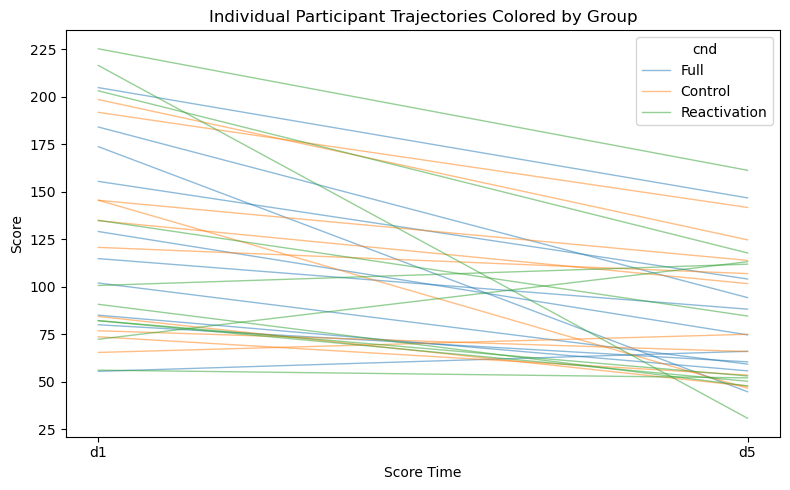

In [6]:
### checking individual participant trajectories colored by group
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=df_long,
    x="score_time",
    y="score",
    hue="cnd",         
    units="subject",    
    estimator=None,     
    alpha=0.5,
    lw=1
)

plt.title("Individual Participant Trajectories Colored by Group")
plt.xlabel("Score Time")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


                       Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          score    
No. Observations:            60               Method:                      REML     
No. Groups:                  30               Scale:                       762.7988 
Min. group size:             2                Log-Likelihood:              -283.3674
Max. group size:             2                Converged:                   Yes      
Mean group size:             2.0                                                    
------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------------------
Intercept                              123.675   17.294  7.151 0.000  89.779 157.571
score_time[T.d5]                       -35.983   14.539 -2.475 0.013 -64.479  -7.487
cnd[

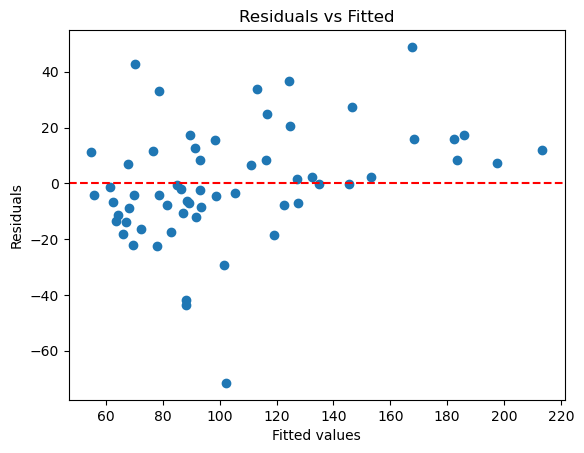

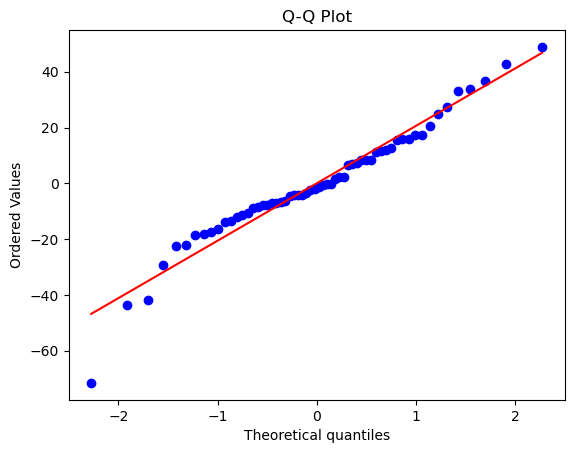

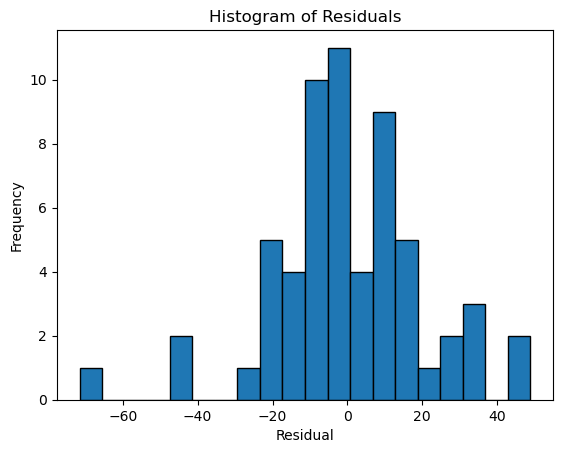

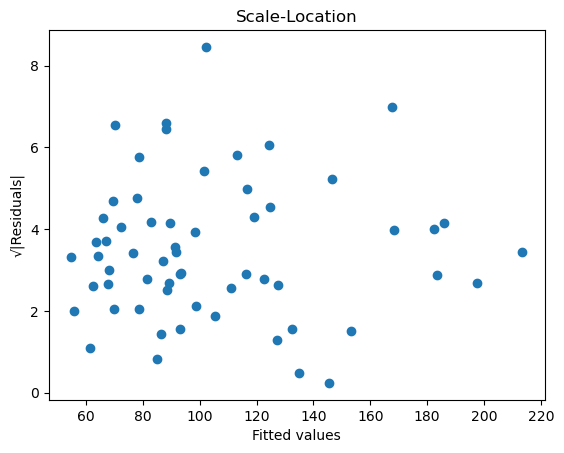

<F test: F=0.018814046890102624, p=0.981368262392837, df_denom=54, df_num=2>


In [7]:
# Set Control as reference group (first in categories)
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=['Control', 'Full','Reactivation'])

# Fit linear mixed model: this gives you the exact formula you want
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract fitted values and residuals
fitted = result.fittedvalues
residuals = result.resid

# 1. Residuals vs Fitted (check homoscedasticity, linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Q-Q plot (check normality of residuals)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Histogram of residuals
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Scale-Location plot (sqrt|residuals| vs fitted)
plt.scatter(fitted, abs(residuals) ** 0.5)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location")
plt.show()
# Joint test for Full vs Control AND Reactivation vs Control
joint_test = result.f_test("cnd[T.Full] = cnd[T.Reactivation] = 0")
print(joint_test)



                       Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          score    
No. Observations:            60               Method:                      REML     
No. Groups:                  30               Scale:                       762.7988 
Min. group size:             2                Log-Likelihood:              -283.3674
Max. group size:             2                Converged:                   Yes      
Mean group size:             2.0                                                    
------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------------------
Intercept                              128.405   17.294  7.425 0.000  94.509 162.301
score_time[T.d5]                       -49.044   14.539 -3.373 0.001 -77.540 -20.548
cnd[

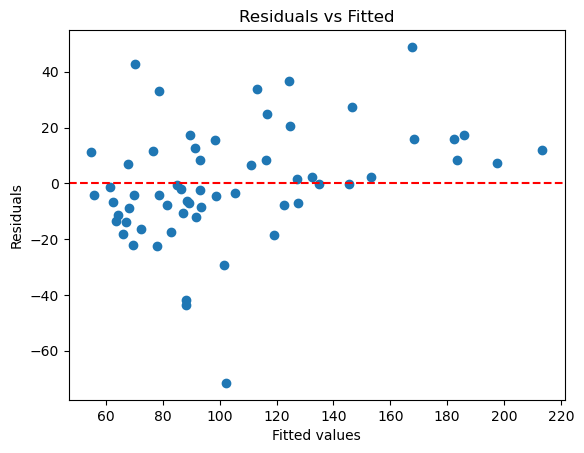

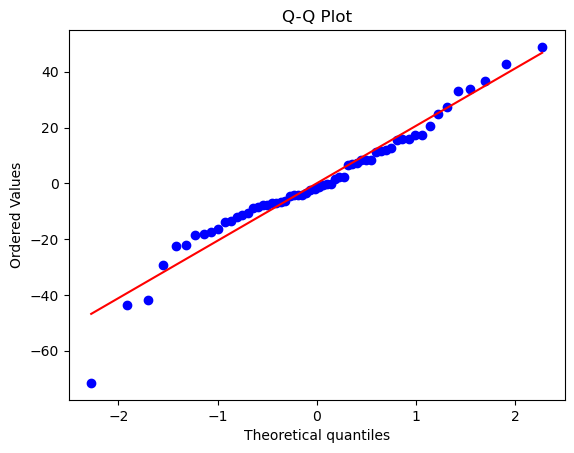

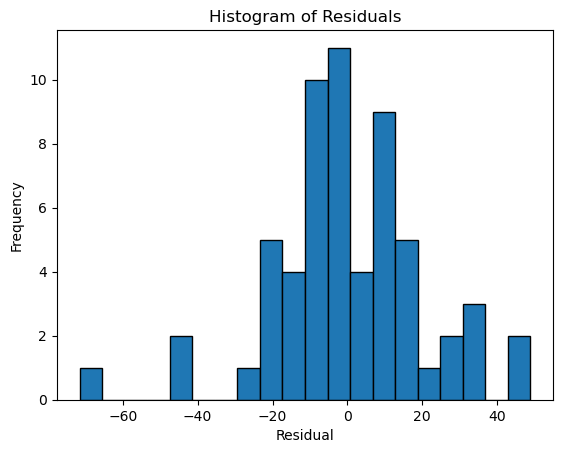

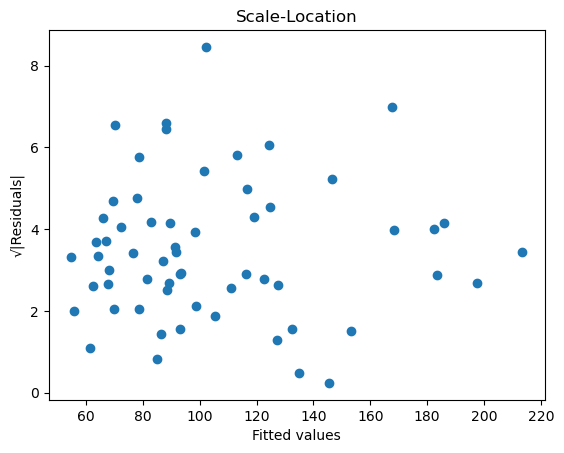

<F test: F=0.018814046890105345, p=0.9813682623928341, df_denom=54, df_num=2>


In [8]:
# Set Full as reference group (first in categories)
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=[ 'Full','Control','Reactivation'])

# Fit linear mixed model: this gives you the exact formula you want
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract fitted values and residuals
fitted = result.fittedvalues
residuals = result.resid

# 1. Residuals vs Fitted (check homoscedasticity, linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Q-Q plot (check normality of residuals)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Histogram of residuals
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Scale-Location plot (sqrt|residuals| vs fitted)
plt.scatter(fitted, abs(residuals) ** 0.5)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location")
plt.show()
# Joint test for Full vs Control AND Reactivation vs Control
joint_test = result.f_test("cnd[T.Control] = cnd[T.Reactivation] = 0")
print(joint_test)



                     Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         score    
No. Observations:         60              Method:                     REML     
No. Groups:               30              Scale:                      762.7988 
Min. group size:          2               Log-Likelihood:             -283.3674
Max. group size:          2               Converged:                  Yes      
Mean group size:          2.0                                                  
-------------------------------------------------------------------------------
                                  Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                         126.358   17.294  7.306 0.000  92.462 160.254
score_time[T.d5]                  -44.152   14.539 -3.037 0.002 -72.648 -15.656
cnd[T.Full]                         2.047   24.458  0.084 0.9

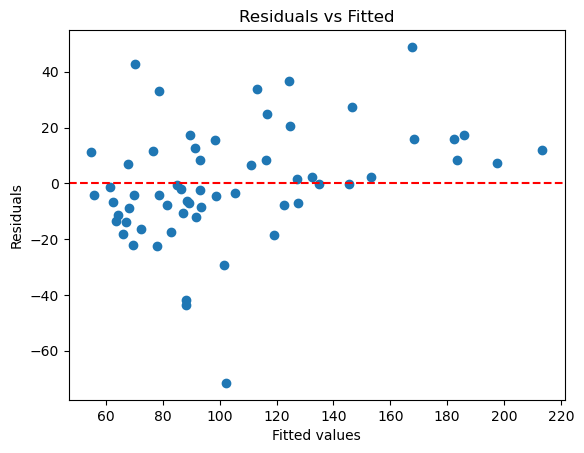

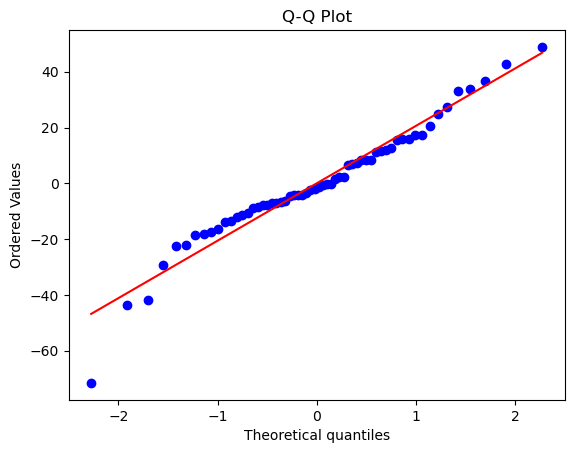

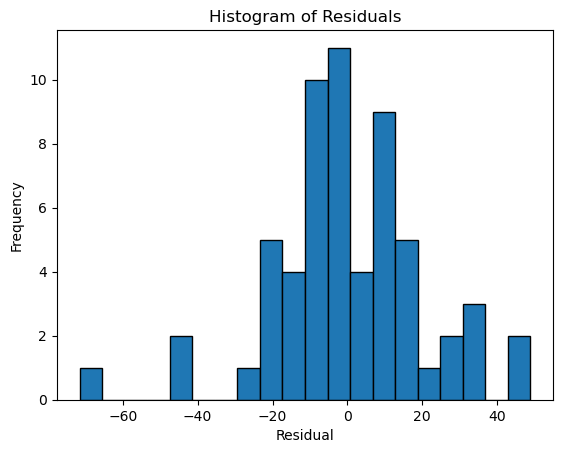

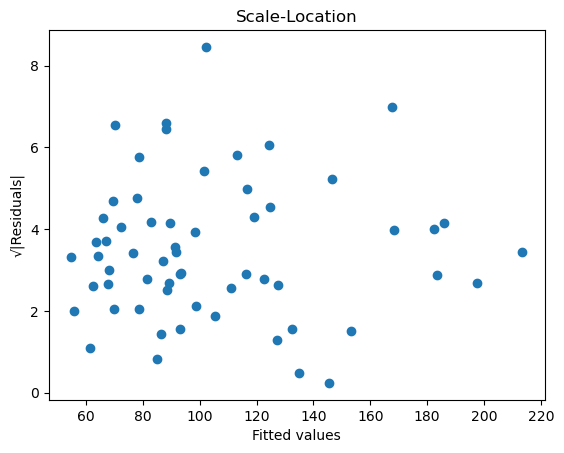

In [9]:
# Set Reminder as reference group (first in categories)
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=[ 'Reactivation','Full','Control'])

# Fit linear mixed model: this gives you the exact formula you want
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract fitted values and residuals
fitted = result.fittedvalues
residuals = result.resid

# 1. Residuals vs Fitted (check homoscedasticity, linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Q-Q plot (check normality of residuals)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Histogram of residuals
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Scale-Location plot (sqrt|residuals| vs fitted)
plt.scatter(fitted, abs(residuals) ** 0.5)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location")
plt.show()




In [10]:
### Correlation between d5 scores and the percentage correction on 15 reminder trials in Reactivation group
from scipy.stats import pearsonr

df = pd.read_csv("all_data_twotasks.csv")
df_reactivation = df[df['cnd'] == 'Reactivation'].dropna(subset=['d5', 'reac_corr'])
corr_coef, p_value = pearsonr(df_reactivation['d5'], df_reactivation['reac_corr'])

print(f"Correlation between d5 scores and reac_corr in Reactivation group:")
print(f"r = {corr_coef:.3f}, p = {p_value:.3f}")


Correlation between d5 scores and reac_corr in Reactivation group:
r = 0.143, p = 0.714


In [17]:
### Making the dataset now for transfer analysis

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data_onetask.csv")

df_long_transfer = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d5', 'Transfer'],
    var_name='score_time',
    value_name='score'
)

subjects_per_group = df_long.groupby('cnd', observed=True)['subject'].nunique()
print(subjects_per_group)

cnd
Reactivation    10
Full            10
Control         10
Name: subject, dtype: int64


Now looking at the transfer data

In [20]:
import scipy.stats as stats
import numpy as np

# Drop rows with NaN in 'score'
df_long_transfer = df_long_transfer.dropna(subset=["score"])

# Filter participants that have both scores overall
complete_subjects = (
    df_long_transfer.groupby("subject")["score_time"]
    .nunique()
    .reset_index()
    .query("score_time == 2")["subject"]
)
df_complete = df_long_transfer[df_long_transfer["subject"].isin(complete_subjects)]

print(f"Number of subjects with both scores: {df_complete['subject'].nunique()}")

# Run paired t-tests per group
results = {}

for group, subdf in df_complete.groupby("cnd", observed=False):
    # Keep only subjects with both d5 and Transfer in this group
    subjects_with_both = subdf.groupby("subject")["score_time"].nunique()
    subjects_with_both = subjects_with_both[subjects_with_both == 2].index
    
    if len(subjects_with_both) < 2:  # Not enough subjects for t-test
        print(f"Skipping group {group}: not enough subjects with both scores ({len(subjects_with_both)})")
        continue
    
    # Pivot to wide format
    wide = subdf[subdf["subject"].isin(subjects_with_both)].pivot(
        index="subject", columns="score_time", values="score"
    )
    
    # Paired t-test
    t, p = stats.ttest_rel(wide["d5"], wide["Transfer"])
    
    # Degrees of freedom
    df_val = wide.shape[0] - 1
    
    # Cohen's d for paired samples
    diff = wide["d5"] - wide["Transfer"]
    cohen_d = diff.mean() / diff.std(ddof=1)
    
    results[group] = {
        "n": wide.shape[0],
        "mean_d5": wide["d5"].mean(),
        "mean_transfer": wide["Transfer"].mean(),
        "t": t,
        "df": df_val,
        "p": p,
        "cohen_d": cohen_d
    }

# Print results per group
for group, res in results.items():
    print(f"\n{group}:")
    print(f"  n = {res['n']}")
    print(f"  Mean D5 = {res['mean_d5']:.2f}")
    print(f"  Mean Transfer = {res['mean_transfer']:.2f}")
    print(f"  Paired t-test: t({res['df']}) = {res['t']:.2f}, p = {res['p']:.4f}, Cohen's d = {res['cohen_d']:.2f}")

# --- Paired t-test across all subjects ---
# Pivot df_complete to wide format
wide_all = df_complete.pivot(index="subject", columns="score_time", values="score").dropna()

# Only perform t-test if at least 2 subjects
if wide_all.shape[0] >= 2:
    t_all, p_all = stats.ttest_rel(wide_all["d5"], wide_all["Transfer"])
    df_all = wide_all.shape[0] - 1
    cohen_d_all = (wide_all["d5"] - wide_all["Transfer"]).mean() / (wide_all["d5"] - wide_all["Transfer"]).std(ddof=1)
    
    print(f"\nAll subjects together:")
    print(f"  n = {wide_all.shape[0]}")
    print(f"  Mean D5 = {wide_all['d5'].mean():.2f}")
    print(f"  Mean Transfer = {wide_all['Transfer'].mean():.2f}")
    print(f"  Paired t-test: t({df_all}) = {t_all:.2f}, p = {p_all:.4f}, Cohen's d = {cohen_d_all:.2f}")
else:
    print("\nNot enough subjects for overall paired t-test.")


Number of subjects with both scores: 9

Control:
  n = 4
  Mean D5 = 106.95
  Mean Transfer = 142.27
  Paired t-test: t(3) = -0.74, p = 0.5110, Cohen's d = -0.37

Full:
  n = 3
  Mean D5 = 60.67
  Mean Transfer = 198.04
  Paired t-test: t(2) = -1.43, p = 0.2883, Cohen's d = -0.83

Reactivation:
  n = 2
  Mean D5 = 101.13
  Mean Transfer = 385.59
  Paired t-test: t(1) = -1.97, p = 0.2996, Cohen's d = -1.39

All subjects together:
  n = 9
  Mean D5 = 90.23
  Mean Transfer = 214.93
  Paired t-test: t(8) = -2.32, p = 0.0487, Cohen's d = -0.77
